## Modelling and Hyper parameter tuning

In [1]:
from pycaret.classification import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/processed/final.csv')
df.head()

,Tenure Months,Monthly Charges,Churn Score,CLTV,county,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Value
0,0.027778,0.354229,0.852632,0.274850,18,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0.013889,0.005473,0.484211,0.702024,18,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2,0.041667,0.614428,0.747368,0.502780,18,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0.819444,0.761194,0.221053,0.719368,18,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,0.069444,0.615423,0.178947,0.716478,18,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [3]:
p_classifier = setup(data = df, target='Churn Value',train_size=0.8)

,Description,Value
0,session_id,7974
1,Target,Churn Value
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7043, 33)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,27
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9180,0.9705,0.8727,0.8241,0.8473,0.7914,0.7923,0.0100
ada,Ada Boost Classifier,0.9292,0.9828,0.8700,0.8606,0.8649,0.8170,0.8173,0.0550
lightgbm,Light Gradient Boosting Machine,0.9260,0.9811,0.8550,0.8608,0.8575,0.8076,0.8079,0.0340
gbc,Gradient Boosting Classifier,0.9301,0.9833,0.8543,0.8752,0.8642,0.8171,0.8176,0.1190
catboost,CatBoost Classifier,0.9283,0.9818,0.8509,0.8715,0.8609,0.8126,0.8129,1.3130
ridge,Ridge Classifier,0.9169,0.0000,0.8455,0.8379,0.8414,0.7851,0.7854,0.0060
qda,Quadratic Discriminant Analysis,0.8843,0.9439,0.8407,0.7476,0.7913,0.7116,0.7141,0.0090
rf,Random Forest Classifier,0.9276,0.9779,0.8387,0.8787,0.8580,0.8094,0.8100,0.1450
lr,Logistic Regression,0.9159,0.9734,0.8366,0.8408,0.8384,0.7816,0.7818,0.4720
nb,Naive Bayes,0.8681,0.9337,0.8326,0.7118,0.7672,0.6761,0.6803,0.0050


In [5]:
best.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

### Model creation and tuning

#### 1 . Ada Boost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [6]:
ada_boost = create_model('ada', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9281,0.9823,0.8435,0.8763,0.8596,0.8113,0.8116
1,0.9290,0.9826,0.8844,0.8497,0.8667,0.8183,0.8186
2,0.9397,0.9848,0.8878,0.8818,0.8847,0.8439,0.8439
3,0.9201,0.9780,0.8367,0.8542,0.8454,0.7915,0.7916
4,0.9316,0.9838,0.8874,0.8553,0.8710,0.8245,0.8248
Mean,0.9297,0.9823,0.8680,0.8634,0.8655,0.8179,0.8181
SD,0.0063,0.0023,0.0228,0.0130,0.0130,0.0171,0.0170


In [7]:
ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 7974}

In [8]:
params = {'n_estimators':range(50, 100, 10),
          'learning_rate':[0.001, 0.01, 0.1, 1.0],
          }

tuned_ada_boost = tune_model(ada_boost, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9326,0.9833,0.8299,0.9037,0.8652,0.8204,0.8218
1,0.9255,0.9820,0.8299,0.8777,0.8531,0.8033,0.8039
2,0.9326,0.9870,0.8435,0.8921,0.8671,0.8220,0.8226
3,0.9220,0.9816,0.8571,0.8456,0.8514,0.7985,0.7985
4,0.9343,0.9834,0.8493,0.8921,0.8702,0.8262,0.8267
5,0.9467,0.9872,0.8844,0.9091,0.8966,0.8607,0.8608
6,0.9290,0.9795,0.8231,0.8963,0.8582,0.8109,0.8122
7,0.9272,0.9813,0.8299,0.8841,0.8561,0.8075,0.8082
8,0.9290,0.9818,0.8776,0.8543,0.8658,0.8175,0.8176
9,0.9361,0.9863,0.8844,0.8725,0.8784,0.8350,0.8350


In [9]:
tuned_ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 90,
 'random_state': 7974}

#### 2. Linear Discriminant Analysis

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

In [10]:
lda = create_model('lda', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9166,0.9700,0.8537,0.8311,0.8423,0.7856,0.7857
1,0.9201,0.9699,0.8912,0.8188,0.8534,0.7987,0.8000
2,0.9193,0.9714,0.8605,0.8350,0.8476,0.7927,0.7928
3,0.9130,0.9687,0.8537,0.8203,0.8367,0.7774,0.7777
4,0.9174,0.9738,0.8874,0.8125,0.8483,0.7917,0.7931
Mean,0.9173,0.9707,0.8693,0.8235,0.8456,0.7892,0.7899
SD,0.0025,0.0018,0.0165,0.0083,0.0057,0.0072,0.0076


In [11]:
lda.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [12]:
params = {'solver':['svd', 'lsqr', 'eigen'] }

tuned_lda = tune_model(lda, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9273,0.9759,0.8639,0.8581,0.8610,0.8118,0.8118
1,0.9060,0.9637,0.8503,0.8013,0.8251,0.7609,0.7615
2,0.9273,0.9729,0.8844,0.8442,0.8638,0.8142,0.8147
3,0.9184,0.9674,0.9116,0.8024,0.8535,0.7973,0.8004
4,0.9130,0.9676,0.8562,0.8170,0.8361,0.7769,0.7773
5,0.9254,0.9747,0.8639,0.8523,0.8581,0.8075,0.8075
6,0.9147,0.9661,0.8639,0.8194,0.8411,0.7829,0.7834
7,0.9130,0.9699,0.8435,0.8267,0.8350,0.7759,0.7760
8,0.9112,0.9728,0.8980,0.7904,0.8408,0.7795,0.7826
9,0.9236,0.9741,0.8912,0.8291,0.8590,0.8067,0.8077


#### 3. Light Gradient Boosting Machine

LightGBM, short for Light Gradient Boosting Machine, is a free and open source distributed gradient boosting framework for machine learning originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.

In [13]:
lightgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9317,0.9810,0.8571,0.8780,0.8675,0.8215,0.8216
1,0.9255,0.9813,0.8810,0.8409,0.8605,0.8097,0.8101
2,0.9335,0.9814,0.8639,0.8789,0.8714,0.8265,0.8265
3,0.9175,0.9786,0.8061,0.8681,0.8360,0.7810,0.7819
4,0.9210,0.9818,0.8669,0.8355,0.8509,0.7972,0.7974
Mean,0.9258,0.9808,0.8550,0.8603,0.8572,0.8071,0.8075
SD,0.0061,0.0011,0.0256,0.0185,0.0127,0.0166,0.0163


In [14]:
lightgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 7974,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [15]:
params = {'n_estimators':range(50, 100, 10),
          'learning_rate':[0.001, 0.01, 0.1, 1.0],
          'num_leaves':range(20,60)
          }

tuned_lightgbm = tune_model(lightgbm, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9344,0.9836,0.8707,0.8767,0.8737,0.8294,0.8294
1,0.9309,0.9801,0.8639,0.8699,0.8669,0.8202,0.8202
2,0.9309,0.9833,0.8503,0.8803,0.8651,0.8186,0.8188
3,0.9238,0.9799,0.8639,0.8467,0.8552,0.8035,0.8036
4,0.9290,0.9812,0.8630,0.8630,0.8630,0.8151,0.8151
5,0.9343,0.9837,0.8571,0.8873,0.8720,0.8278,0.8280
6,0.9254,0.9796,0.8027,0.9008,0.8489,0.7996,0.8020
7,0.9201,0.9803,0.8163,0.8696,0.8421,0.7887,0.7894
8,0.9307,0.9805,0.8707,0.8649,0.8678,0.8209,0.8209
9,0.9307,0.9828,0.8503,0.8803,0.8651,0.8185,0.8187


### Comparison of models

#### 1. Confusion Matrix

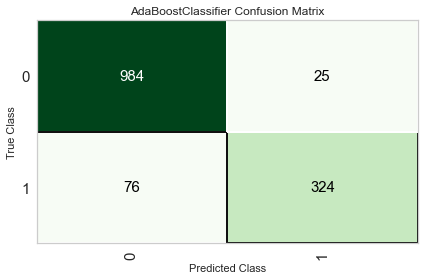

In [20]:

plot_model(tuned_ada_boost, plot = 'confusion_matrix')

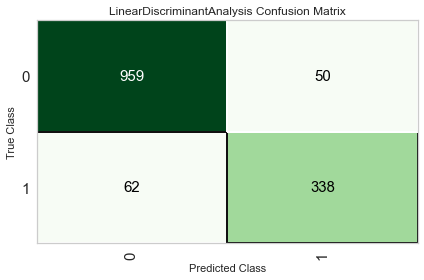

In [21]:
plot_model(tuned_lda, plot = 'confusion_matrix')

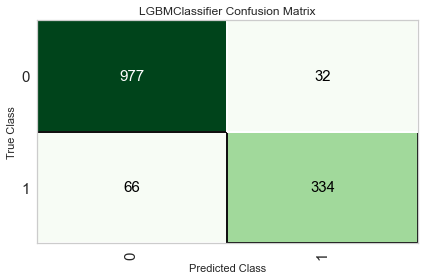

In [22]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

#### 2. Classification Report

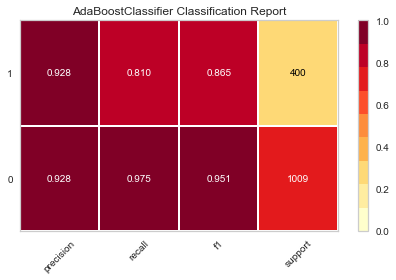

In [25]:
plot_model(tuned_ada_boost, plot = 'class_report')

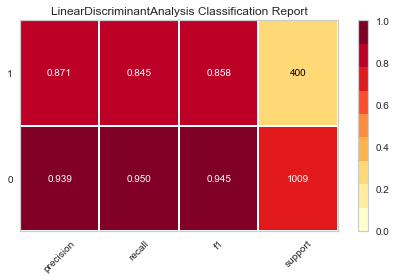

In [26]:
plot_model(tuned_lda, plot = 'class_report')

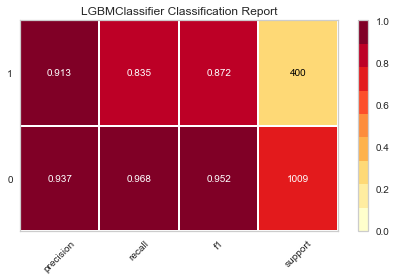

In [27]:
plot_model(tuned_lightgbm, plot = 'class_report')

For Telco Customer dataset, we are trying to create a model that predicts customer churn. The company is looking to idenitfy those cusomers who might churn and try to retain them with good offers as per retention policies. Here the main concern is correctly predicting Churn = 1. For a customer who is going to churn, if the model predicts churn = 0 (False Negative), the company fails to retain those customers. Hence, the evaluation metric most suitable for this scenario is Recall.

Based on the above comparisons, Linear Discriminant Analysis algorithm provides the best scores for Recall.

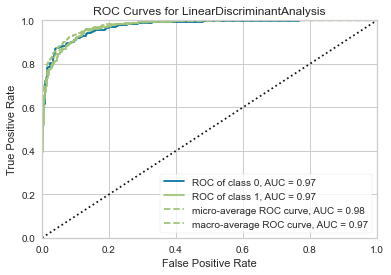

In [28]:
plot_model(tuned_lda, plot = 'auc')

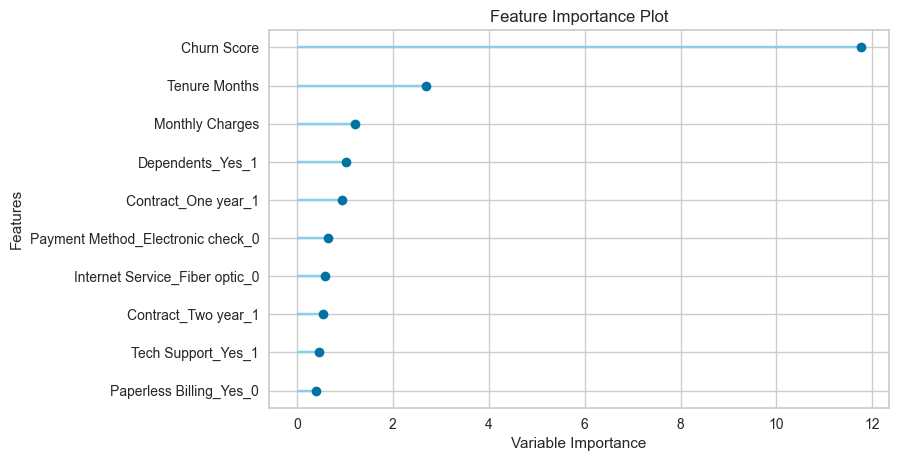

In [29]:
plot_model(tuned_lda, plot = 'feature')

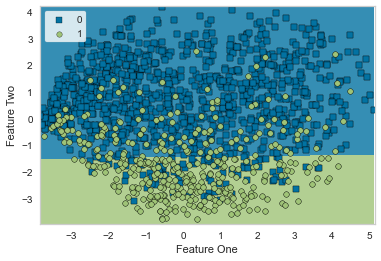

In [30]:
plot_model(tuned_lda, plot = 'boundary')

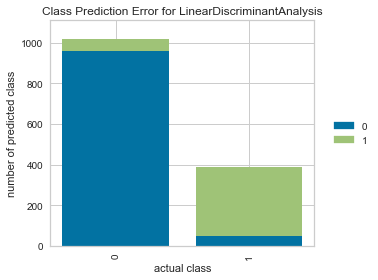

In [31]:
plot_model(tuned_lda, plot = 'error')

In [32]:
predict_model(tuned_lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9205,0.9738,0.8450,0.8711,0.8579,0.8027,0.8029


#### Clustering approach

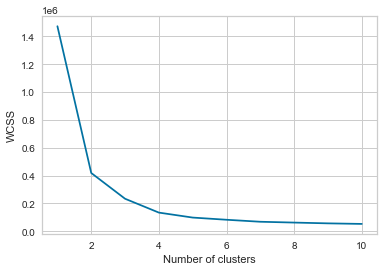

In [33]:
from sklearn.cluster import KMeans

X = df.drop(columns='Churn Value')
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)   
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.show()

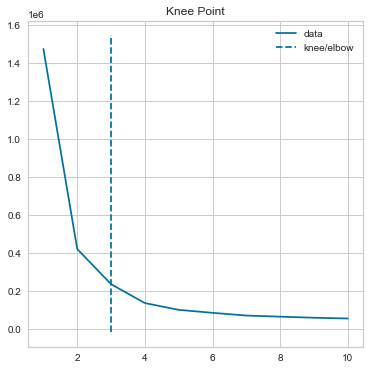

In [34]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11), wcss, curve='convex', direction="decreasing")
kl.plot_knee()

In [35]:
k_val = kl.knee
k_val

3

In [36]:
# divide data into clusters

In [37]:
km_model = KMeans(n_clusters=k_val, random_state=42)
y_km = km_model.fit_predict(X)

# assign the cluster label to each row
X['cluster'] = y_km
X['Churn'] = df['Churn Value']

In [38]:
clusters = X['cluster'].unique()
clusters

array([1, 0, 2])

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score

def get_best_model(X_train, X_test, y_train, y_test):
    
    # Hyper parameter tuning for LDA
    params = {'solver':['svd', 'lsqr', 'eigen'] }
    
    cv_lda = GridSearchCV(LinearDiscriminantAnalysis(), params, n_jobs=-1, cv=5)
    cv_lda.fit(X_train, y_train)
    lda_solver = cv_lda.best_params_['solver']
    
    lda = LinearDiscriminantAnalysis(solver=lda_solver)
    lda.fit(X_train, y_train)
    lda_score = recall_score(y_test, lda.predict(X_test))

    
    # Hyper parameter tuning for Ada Boost
    params = {'n_estimators':range(50, 100, 10),
          'learning_rate':[0.001, 0.01, 0.1, 1.0],
          }
    
    cv_ada = GridSearchCV(AdaBoostClassifier(), params, n_jobs=-1, cv=5)
    cv_ada.fit(X_train, y_train)
    ada_n_estimators = cv_ada.best_params_['n_estimators']
    ada_learning_rate = cv_ada.best_params_['learning_rate']
    
    ada_boost = AdaBoostClassifier(n_estimators = ada_n_estimators, learning_rate=ada_learning_rate)
    ada_boost.fit(X_train, y_train)
    ada_score = recall_score(y_test, ada_boost.predict(X_test))

    
    if lda_score >  ada_score:
        return "LDA", lda_score
    else:
        return "ada boost", ada_score

In [41]:
from sklearn.model_selection import train_test_split

for i in clusters:
    cluster_data = X[X['cluster']==i]
    
    cluster_X = cluster_data.drop(['cluster', 'Churn'], axis=1)
    cluster_y = cluster_data['Churn'].values
    
    X_train, X_test, y_train, y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, random_state=42)
    best_model_name, best_score = get_best_model(X_train, X_test, y_train, y_test)
    print("For cluster {}, best model is {} with score {}".format(i, best_model_name, best_score))

For cluster 1, best model is LDA with score 0.8554216867469879
For cluster 0, best model is ada boost with score 0.9112903225806451
For cluster 2, best model is LDA with score 0.935064935064935


In [45]:
tuned_lda.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

### Conclusion

LDA is identified as best model by both approaches.